# 911 Calls Data Analysis

I will be looking at the Emergency 911 Calls Montegomery County Data set.

I will be making visualizations of this data set in order to analyze and extract insights.

Start by importing the relevant libraries I plan on using as well as the dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
import os

new_directory = '/Users/sridharmalladi/Downloads'
#Changing the working directory
os.chdir(new_directory)

import os

# Get the current working directory
current_directory = os.getcwd()

print("Current Working Directory:", current_directory)

Current Working Directory: /Users/sridharmalladi/Downloads


In [4]:
import pandas as pd

df = pd.read_csv('911.csv')


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423909 entries, 0 to 423908
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        423909 non-null  float64
 1   lng        423909 non-null  float64
 2   desc       423909 non-null  object 
 3   zip        371780 non-null  float64
 4   title      423909 non-null  object 
 5   timeStamp  423909 non-null  object 
 6   twp        423750 non-null  object 
 7   addr       423909 non-null  object 
 8   e          423909 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 29.1+ MB


In [6]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [7]:
#checking for any missing data
df.isnull().sum()

lat              0
lng              0
desc             0
zip          52129
title            0
timeStamp        0
twp            159
addr             0
e                0
dtype: int64

In [8]:
#The top 5 zip codes for 911 calls with the data we have
df['zip'].value_counts().head()

zip
19401.0    28656
19464.0    27948
19403.0    21631
19446.0    20496
19406.0    14097
Name: count, dtype: int64

In [9]:
#The top 5 townships for 911 calls with the data we have
df['twp'].value_counts().head()

twp
LOWER MERION    36441
ABINGTON        25835
NORRISTOWN      23883
UPPER MERION    22694
CHELTENHAM      19629
Name: count, dtype: int64

# Extracting 911 Call Reasons

There seems to be a variety of, what seems like, the reason/results of the 911 call under the title column. I assume that this is what they use to quickly describe what kind of incident occured.

In [10]:
#Let's see how many unique title codes there are.
df['title'].nunique()

141

In [11]:
df['Reason'] = df['title'].apply(lambda st: st.split(':')[0])

In [12]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


Now that we have this new column, let's look at what is happening a little closer



In [13]:
df['Reason'].value_counts()

Reason
EMS        208676
Traffic    151458
Fire        63775
Name: count, dtype: int64

<Axes: xlabel='Reason', ylabel='count'>

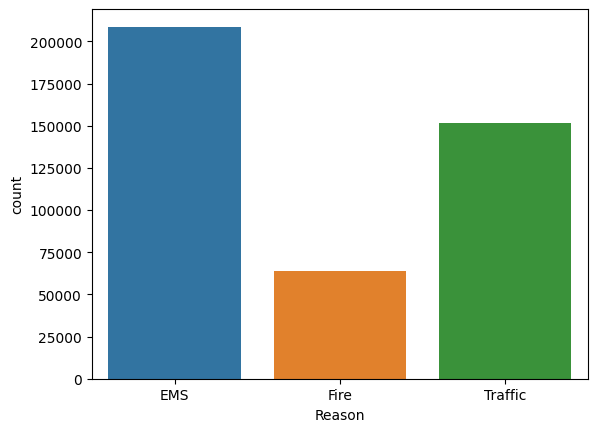

In [14]:
#let's visualize the above result to visually compare these numbers
sns.countplot(x='Reason',data=df)

We can quickly note, from the above graph, that fires are less represented in our data set.

# Extracting Time Data


In [15]:
#checking the timestamp column datatype
type(df['timeStamp'].iloc[0])

str

In [16]:
#convert them to DateTime objects
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [17]:
type(df['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

Now that the time stamps have been converted, we can begin adding new columns based on the time information.

In [18]:
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)

In [19]:
df['Month'] = df['timeStamp'].apply(lambda time: time.month)

In [20]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek).map(dmap)

In [21]:
#check to see our new dataframe
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,Thu


# Graphing Reason and Time Data

Now, let's look at this time data with our Reason column

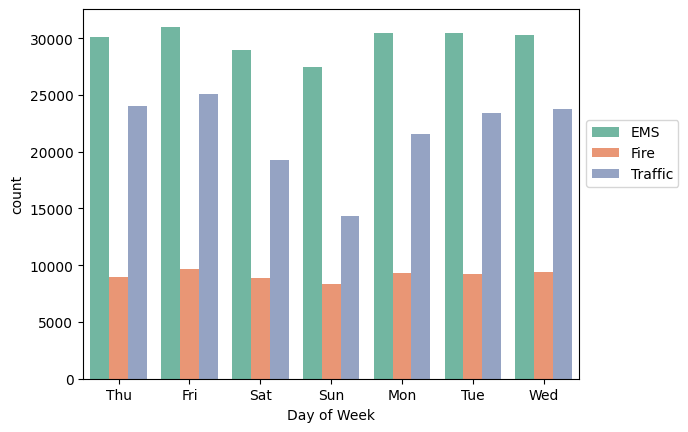

In [22]:
sns.countplot(x='Day of Week', data = df, hue = 'Reason', palette = 'Set2')
plt.legend(loc='lower left',bbox_to_anchor=(1.0,0.5))

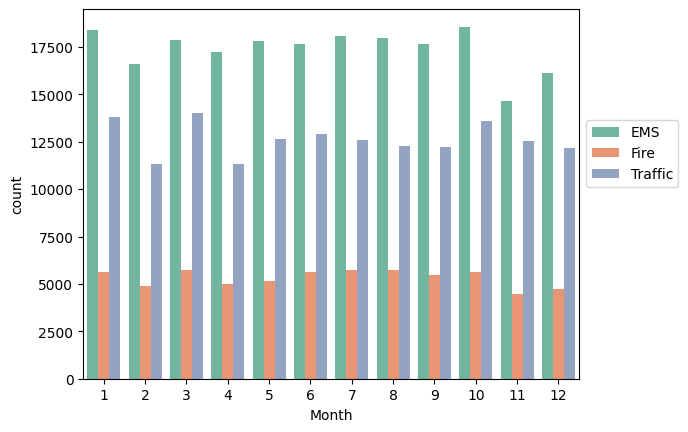

In [23]:
sns.countplot(x='Month', data = df, hue = 'Reason', palette = 'Set2')
plt.legend(loc='lower left',bbox_to_anchor=(1.0,0.5))

It seems that, at a quick glance at these two graphs, we see that Traffic calls are generally reduced on the weekends, and that calls because of fire are much lower in number per month than EMS and Traffic.

Let's get a better understanding of the total number of calls per month.

In [24]:
df.groupby('Month').count()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,37824,37824,37824,33480,37824,37824,37812,37824,37824,37824,37824,37824
2,32828,32828,32828,28963,32828,32828,32817,32828,32828,32828,32828,32828
3,37666,37666,37666,33416,37666,37666,37651,37666,37666,37666,37666,37666
4,33583,33583,33583,29488,33583,33583,33575,33583,33583,33583,33583,33583
5,35644,35644,35644,31114,35644,35644,35628,35644,35644,35644,35644,35644
6,36171,36171,36171,31501,36171,36171,36152,36171,36171,36171,36171,36171
7,36405,36405,36405,31863,36405,36405,36391,36405,36405,36405,36405,36405
8,35972,35972,35972,31512,35972,35972,35957,35972,35972,35972,35972,35972
9,35339,35339,35339,30772,35339,35339,35325,35339,35339,35339,35339,35339


Text(0, 0.5, 'count')

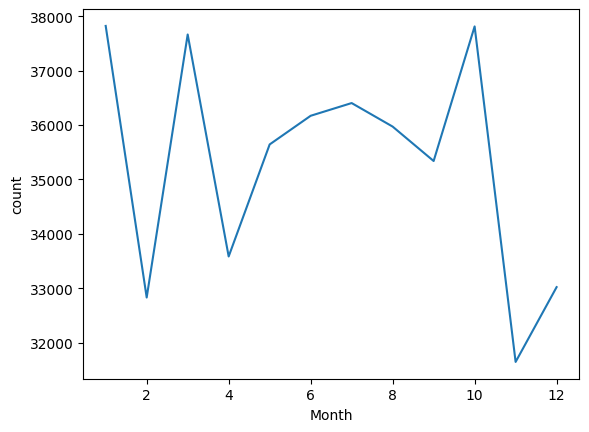

In [25]:
#let's turn this into a graph to better understand calling trends per month
df.groupby('Month').count().plot.line(use_index = True,y = 'title',legend = None)
plt.ylabel('count')

There's a lot of spikes in the above graph, so let's do a linear regression to see the general trendline and understand our data better.

Text(7.125000000000009, 0.5, 'count')

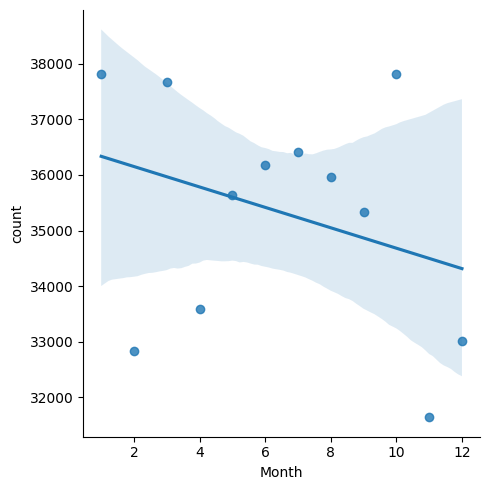

In [27]:
sns.lmplot(x='Month',y = 'title', data = df.groupby('Month').count().reset_index())
plt.ylabel('count')

We see from above that the trendline is slightly negative with large variance towards the beginning and ending months of the data set

# Graphing Timeline

To continue exploring, let's find out what the actual data looks like for each reason given the date

In [28]:
#let's use the timestamp information to create a new column
df['Date'] = df['timeStamp'].apply(lambda ts: ts.date())

In [29]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,Thu,2015-12-10


Now let's plot the total 911 calls by date.

Text(0, 0.5, 'count')

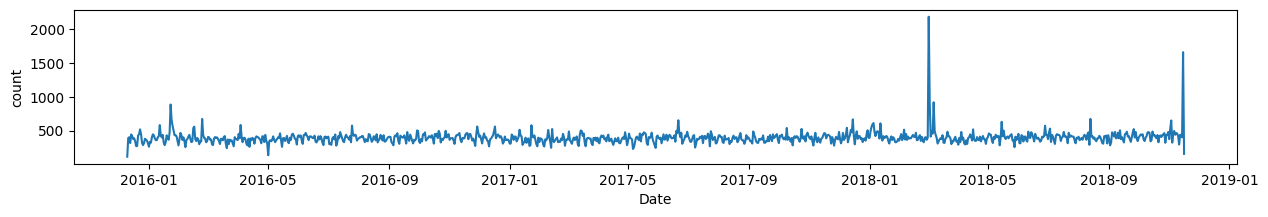

In [30]:
df.groupby('Date').count().plot.line(use_index = True, y = 'title', figsize= (15,2), legend = None)
plt.ylabel('count')

We notice giant outliers in March of 2018 and in November of 2018.

# Investigating Outliers

In [31]:
df['Date'] = pd.to_datetime(df['Date'])

Text(0, 0.5, 'count')

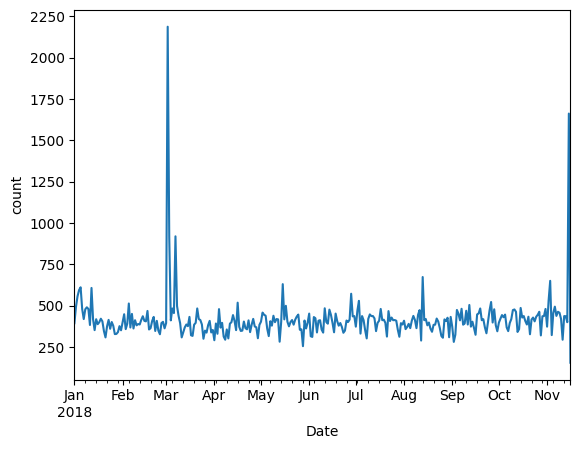

In [32]:
df.groupby(df[df['Date'].dt.year>=2018]['Date']).count().plot.line(use_index = True, y = 'title', legend = None)
plt.ylabel('count')

We see the first one in March. Let's track it down to what day.

In [33]:
df.groupby(df[(df['Date'].dt.year>= 2018) & (df['Date'].dt.month==3)]['Date']).count()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week,Date
Date,,,,,,,,,,,,,,
2018-03-01,396,396,396,354,396,396,396,396,396,396,396,396,396,396
2018-03-02,2187,2187,2187,1986,2187,2187,2187,2187,2187,2187,2187,2187,2187,2187
2018-03-03,917,917,917,836,917,917,917,917,917,917,917,917,917,917
2018-03-04,412,412,412,369,412,412,412,412,412,412,412,412,412,412
2018-03-05,484,484,484,439,484,484,484,484,484,484,484,484,484,484
2018-03-06,456,456,456,397,456,456,455,456,456,456,456,456,456,456
2018-03-07,920,920,920,824,920,920,920,920,920,920,920,920,920,920
2018-03-08,499,499,499,449,499,499,499,499,499,499,499,499,499,499
2018-03-09,439,439,439,396,439,439,439,439,439,439,439,439,439,439


We see that, scanning the above table, that on the 2nd there were about 4-5 times the normal amount of calls for the rest of the month.
Let's see if we can understand what might have happened on that day from the data we have.

In [34]:
#Checking the reasons to see if it's distributed according to the entire dataset.
df[df['Date']=='2018-03-02']['Reason'].value_counts()

Reason
Traffic    1328
Fire        568
EMS         291
Name: count, dtype: int64

<Axes: xlabel='Reason', ylabel='count'>

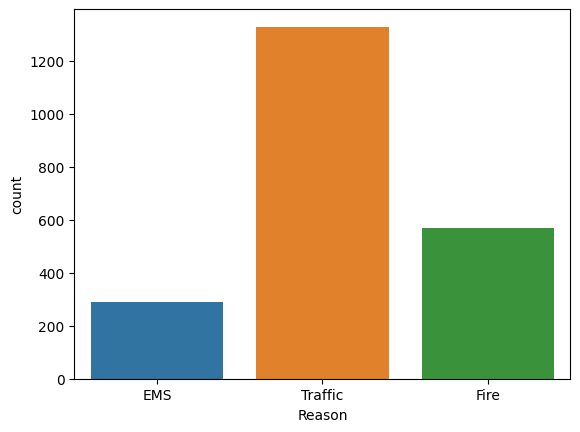

In [35]:
sns.countplot(x='Reason',data=df[df['Date']=='2018-03-02'])

We see that this count distribution looks very different than our original total count distribution for the entire dataset. We can draw from this that there was most likely an event that caused more traffic calls to happen, maybe a big sports game, weather issue, or something else.

After some quick research, it does appear that Montgomery county was experiencing extreme weather and power outages on this day. It is very likely that this was the cause of the anomoly from March 2, 2018.

In [36]:
#reusing the same code from before
df.groupby(df[(df['Date'].dt.year>= 2018) & (df['Date'].dt.month==11)]['Date']).count()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week,Date
Date,,,,,,,,,,,,,,
2018-11-01,374,374,374,325,374,374,374,374,374,374,374,374,374,374
2018-11-02,534,534,534,482,534,534,534,534,534,534,534,534,534,534
2018-11-03,651,651,651,562,651,651,650,651,651,651,651,651,651,651
2018-11-04,323,323,323,281,323,323,323,323,323,323,323,323,323,323
2018-11-05,457,457,457,401,457,457,456,457,457,457,457,457,457,457
2018-11-06,495,495,495,441,495,495,495,495,495,495,495,495,495,495
2018-11-07,439,439,439,389,439,439,439,439,439,439,439,439,439,439
2018-11-08,464,464,464,399,464,464,464,464,464,464,464,464,464,464
2018-11-09,458,458,458,418,458,458,458,458,458,458,458,458,458,458


<Axes: xlabel='Reason', ylabel='count'>

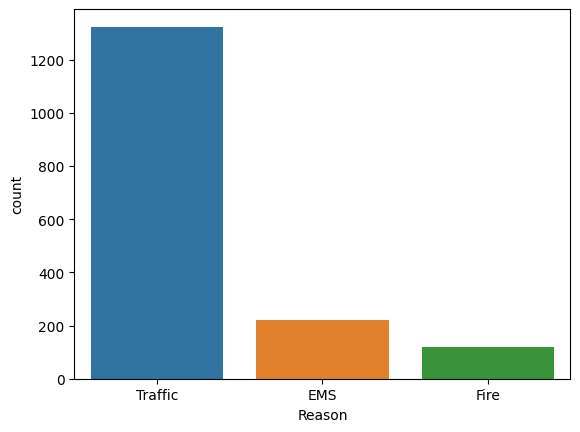

In [37]:
sns.countplot(x='Reason',data=df[df['Date']=='2018-11-15'])

Again, we see that something happened on November 15th. Because the November 15th graph also shows a high count of traffic calls, we have a sense that it could be similar to the March 2nd incident where the cause was extreme weather.

After quickly researching the date again, we see that it was most likely due to extreme weather, just as it was March 2nd, 2018. 

It's interesting to note that, of the 3 years of data, both of the anomolies caused by extreme weather were in 2018. Further investigation beyond the scope of this analysis could be done to see if the weather in 2018 for montegomery county was significantly greater than the previous two years. It would be interesting to see what specifically caused the comparively large increase in 911 calls for those weather events and not, presumably, for any in 2016 and 2017. There could be a number of factors (power outages, awareness of incoming conditions, severity of the weather, etc.) that could be further investigated to try to find the source of what caused the increase in 911 calls. Again, this is not within the scope of this analysis, but it is worth mentioning where this could lead and the potential benefit of knowing the cause(s) to gain insight on how to better prepare for extreme weather conditions in the future..

Out of curiosity, let's continue exploring the number of calls by date, but, this time, let's break it down by reason.

In [38]:
#unstacking and viewing the groupby table so we can find out how to select our data.
df.groupby(['Date','Reason']).count().unstack()

lat               lng              desc               zip  ...  \
Reason      EMS Fire Traffic  EMS Fire Traffic  EMS Fire Traffic  EMS  ...   
Date                                                                   ...   
2015-12-10   58   15      41   58   15      41   58   15      41   53  ...   
2015-12-11  186   68     137  186   68     137  186   68     137  166  ...   
2015-12-12  188   69     145  188   69     145  188   69     145  170  ...   
2015-12-13  191   50      75  191   50      75  191   50      75  179  ...   
2015-12-14  221   39     184  221   39     184  221   39     184  200  ...   
...         ...  ...     ...  ...  ...     ...  ...  ...     ...  ...  ...   
2018-11-12  211   83     144  211   83     144  211   83     144  192  ...   
2018-11-13  187   68     182  187   68     182  187   68     182  168  ...   
2018-11-14  187   54     160  187   54     160  187   54     160  177  ...   
2018-11-15  220  118    1324  220  118    1324  220  118    1324  191  ...   
2018-11-16   45   20      91   45   20      91   45   20      91   42  ...   

                 e Hour              Month              Day of Week       \
Reason     Traffic  EMS Fire Traffic   EMS Fire Traffic         EMS Fire   
Date                                                                       
2015-12-10      41   58   15      41    58   15      41          58   15   
2015-12-11     137  186   68     137   186   68     137         186   68   
2015-12-12     145  188   69     145   188   69     145         188   69   
2015-12-13      75  191   50      75   191   50      75         191   50   
2015-12-14     184  221   39     184   221   39     184         221   39   
...            ...  ...  ...     ...   ...  ...     ...         ...  ...   
2018-11-12     144  211   83     144   211   83     144         211   83   
2018-11-13     182  187   68     182   187   68     182         187   68   
2018-11-14     160  187   54     160   187   54     160         187   54   
2018-11-15    1324  220  118    1324   220  118    1324         220  118   
2018-11-16      91   45   20      91    45   20      91          45   20   

                    
Reason     Traffic  
Date                
2015-12-10      41  
2015-12-11     137  
2015-12-12     145  
2015-12-13      75  
2015-12-14     184  
...            ...  
2018-11-12     144  
2018-11-13     182  
2018-11-14     160  
2018-11-15    1324  
2018-11-16      91  

[1073 rows x 36 columns]

Text(0, 0.5, 'count')

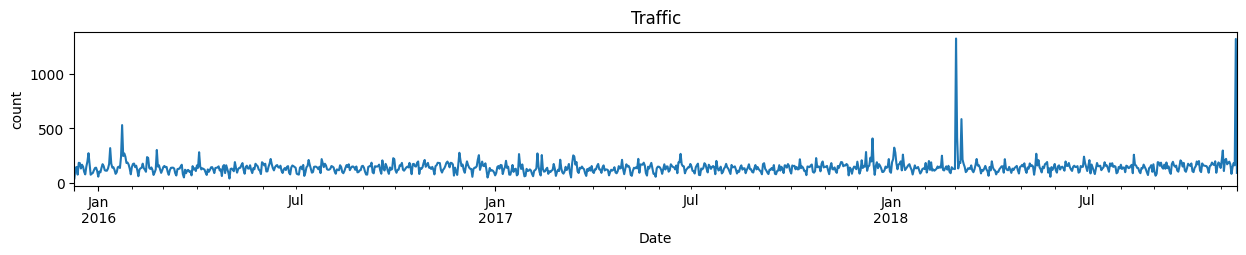

In [39]:
#Traffic
df.groupby(['Date','Reason']).count()['title'].unstack().plot.line(use_index = True, y = 'Traffic', figsize= (15,2), legend = None)
plt.title('Traffic')
plt.ylabel('count')

Text(0, 0.5, 'count')

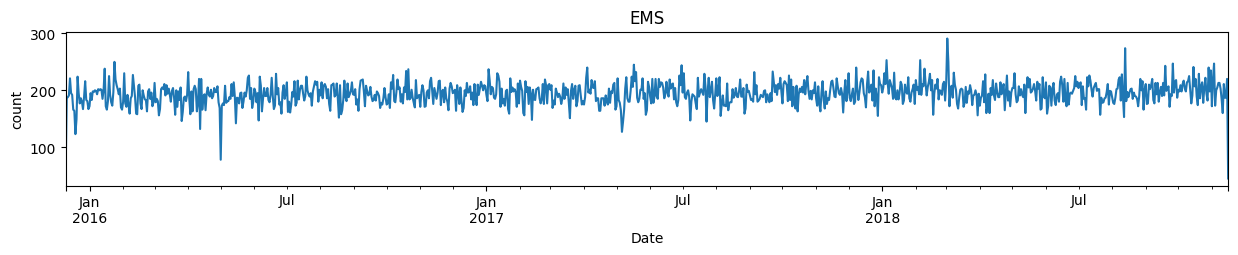

In [40]:
#EMS
df.groupby(['Date','Reason']).count()['title'].unstack().plot.line(use_index = True, y = 'EMS', figsize= (15,2), legend = None)
plt.title('EMS')
plt.ylabel('count')

Text(0, 0.5, 'count')

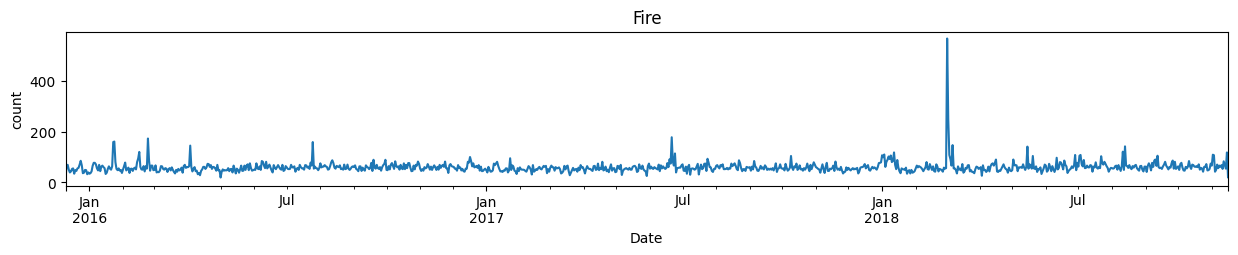

In [41]:
#Fire
df.groupby(['Date','Reason']).count()['title'].unstack().plot.line(use_index = True, y = 'Fire', figsize= (15,2), legend = None)
plt.title('Fire')
plt.ylabel('count')

We see that the first two graphs show us roughly what we expected - the traffic graph having two large outliers that we investigated earlier, and the EMS graph being about average, with the exception of a few datapoints having less than average (because these are not zero, indicating something wrong with the data, and seem like reasonable decreases, we're going to assume that they are part of the natural outliers that you would see in any dataset).

What we didn't notice until now, though, was that, along with the number of traffic calls being high on March 2, 2018, we also see that the number of calls for fire were abnormally high as well. With the count plot earlier, we were simply looking for a difference in distribution, not necessarily in quantity, over each category to denote it being abnormal. Now, however, going back to the count plot for March 2, 2018, we see that the fire count is around 600, much larger than the percieved average in the fire calls graph above. This shows the importance of checking each of the major categories in your data, especially ones that could lead you to conclusions, so that you can more accurately see what is going on. In this case, it wasn't just that severe weather most likely attributed to a higher traffic call count, it also attributed to higher fire count for March 2, 2018.

From here, another place you could explore, is the question following question: "Why were there more fire calls in the March 2,2018 weather incident but not the November 11th, 2018 weather incident?". This question is beyond the scope of this analysis but it's also worth mentioning where you could go because of this data, potentially leading to more information on how to specifically prevent more fire accidents by studying these two dates and analyzing what occured and why.

# Heat Maps

Finally, let's move to looking at how the time of day and day of week interact with the number of 911 calls. For this, we'll be creating a heat map using seaborn.

In [42]:
#First need to change the dataframe to a pivot table with days of week and hours in day
dfht = df.groupby(['Day of Week','Hour']).count().unstack()['title']
dfht

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,1185,1001,930,832,821,1051,1676,2689,3185,3295,...,4150,4514,4711,4489,3616,3254,2789,2445,2210,1866
Mon,1207,974,857,784,871,1124,1729,2829,3588,3685,...,3547,3975,4063,4003,3512,2821,2418,2005,1698,1283
Sat,1515,1332,1206,1012,936,985,1230,1640,2211,2766,...,3479,3284,3348,3274,3174,3036,2632,2432,2073,1913
Sun,1520,1331,1263,1033,954,941,1119,1568,1933,2421,...,2992,2828,2855,2872,2829,2679,2362,1994,1632,1470
Thu,1115,873,920,775,784,1091,1801,2913,3468,3457,...,3904,4139,4053,4412,3578,2923,2579,2230,1784,1486
Tue,1086,918,812,783,824,1075,1806,2912,3650,3563,...,3831,4087,4265,4396,3753,2960,2535,2147,1705,1350
Wed,1022,952,808,795,711,1040,1763,3060,3566,3528,...,3933,4149,4443,4487,3609,2927,2645,2236,1794,1399


<Axes: xlabel='Hour', ylabel='Day of Week'>

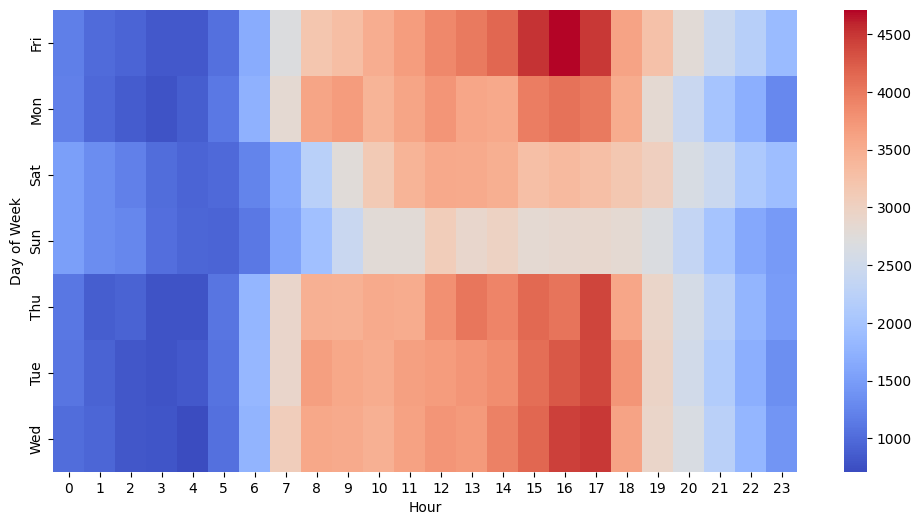

In [43]:
fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(dfht, cmap='coolwarm',ax = ax)

We see that most of the call density comes during the day and most prevelent on business days, which are both expected. Let's look at a cluster map of this data to better understand the similarities.

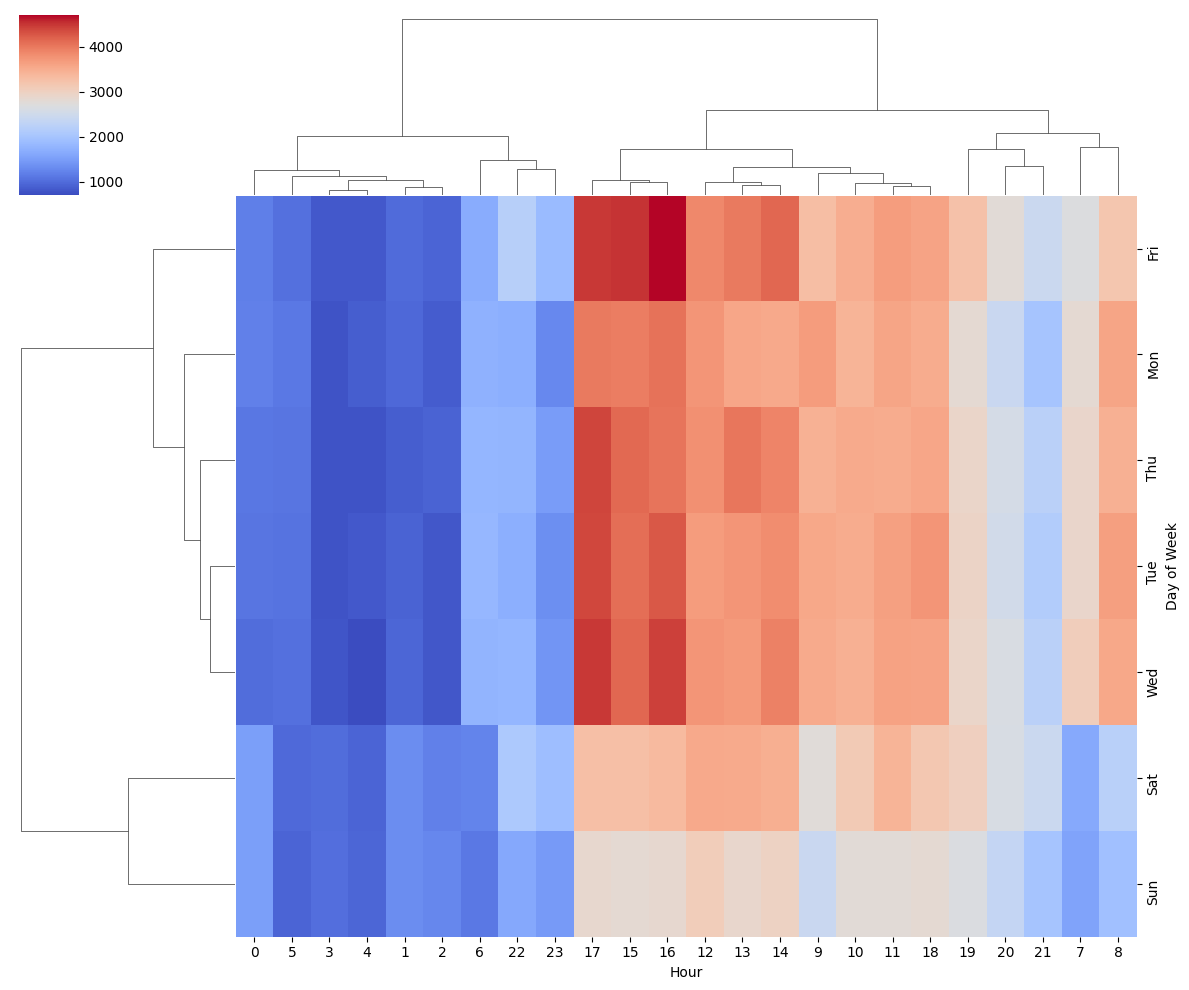

In [44]:
sns.clustermap(dfht, cmap = 'coolwarm', figsize = (12,10))

This cluster map more clearly shows that the hours and days of the week that have the most density are the weekdays during conventional working hours of 9 am to 6 pm.

Let's find out what the heatmap of the month and the day of the week looks like.

In [45]:
#Creating the dataframe we'll use
dfmt = df.groupby(['Day of Week','Month']).count().unstack()['title']
dfmt

Month,1,2,3,4,5,6,7,8,9,10,11,12
Day of Week,,,,,,,,,,,,
Fri,5532,4848,7344,5195,4989,5867,5380,5312,6010,5179,4525,5570
Mon,5716,5214,4663,5154,5019,5045,5792,5212,4675,6385,4157,4286
Sat,5103,4431,4914,4947,4275,4868,4883,4355,5023,5051,4043,5200
Sun,4882,3806,3569,4628,3940,4019,5114,3963,4245,4852,3210,3896
Thu,4985,4708,6010,4637,5469,5951,4954,5328,5300,4940,5978,4899
Tue,6118,4755,5090,4413,6203,5013,5488,5690,4930,5827,4823,4691
Wed,5488,5066,6076,4609,5749,5408,4794,6112,5156,5581,4907,4477


<Axes: xlabel='Month', ylabel='Day of Week'>

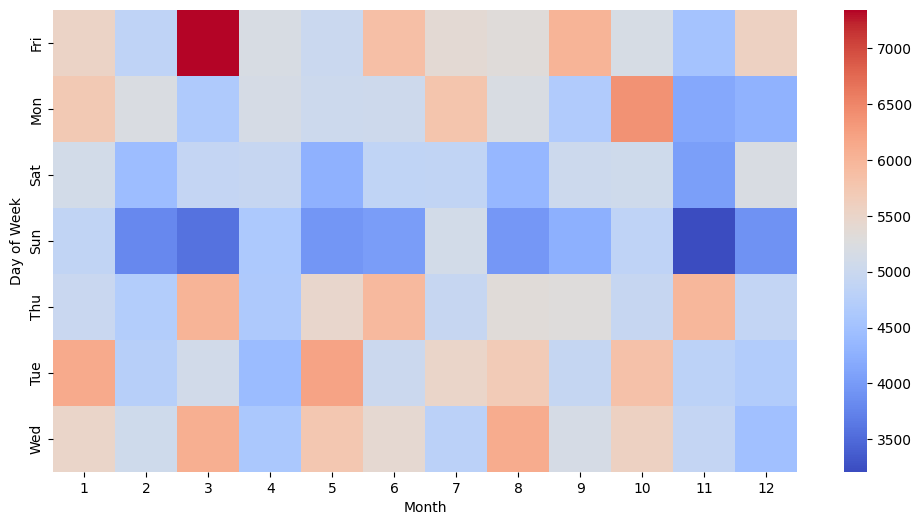

In [46]:
#Heatmap
fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(dfmt, cmap='coolwarm', ax = ax)

We see that the biggest density is on Friday in March. This is surely influenced by the weather incident that we looked at earlier that fell on Friday, March 2, 2018. It's important to note that, although we expected to see a heavier density in November due to the other incident, at the time of this analysis, our data stops mid-November, making the months of November and December less valuable to look at due to the lower amount of data in the dataset.

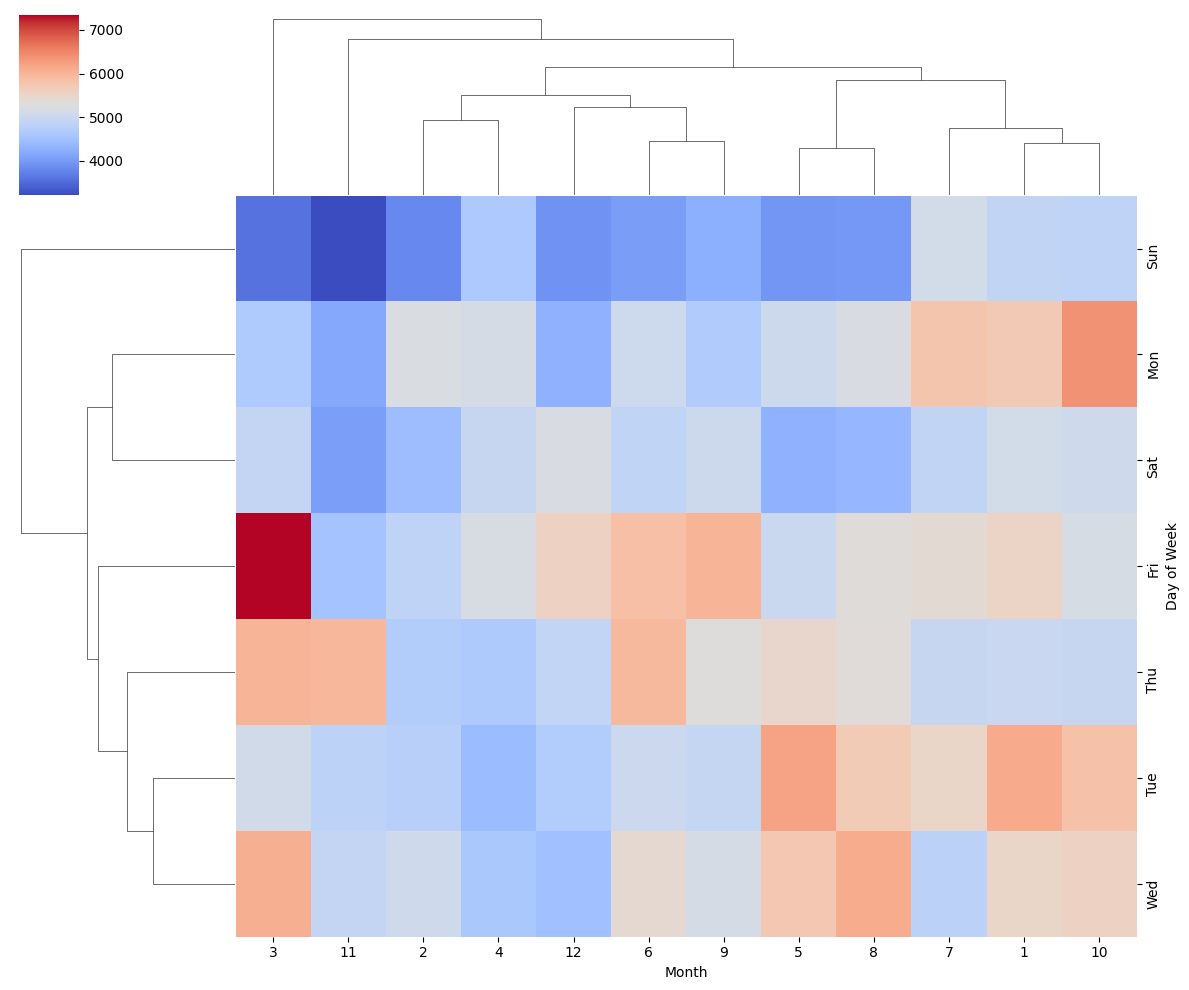

In [47]:
#let's make a cluster map of the same information
sns.clustermap(dfmt, cmap = 'coolwarm', figsize = (12,10))

The most clear observation we can make from the clustermap is that sunday is generally the lowest day of the week for 911 calls.

# Conclusion

In this visual analysis we were able to practice many different visualization techniques while exploring this dataset. We used pandas to create dataframes and sift through our data, reorganizing, extracting, and graphing important data categories that we want to visualize. For the dataset, we found the EMS-related calls represented the most 911 calls, followed by traffic and then fire. We found 2 outliers that occured on March 2nd, 2018 and November 15th, 2018, both likely due to sever weather conditions, and mentioned how, with more research, you could draw insights from the investigation of these two dates and the data behind it.
